# Sentiment Analysis for OPD

## Introduction

According to Oxford dictionary, definition of sentiment analysis is _**The process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer’s attitude towards a particular topic, product, etc. is positive, negative, or neutral."**_


Unfortunately I didn’t have the luxury of having pre-labelled/scored comments from previous years and hence couldn’t go for the supervised methods and thus had to rule out a large number of popular NLP techniques. My search for a pre-labelled survey related dataset from public data sources didn’t work out as well and hence started exploring unsupervised methods, which seemed very limited in number.  
After bit of research I zeroed in on two popular unsupervised sentiment analysis packages in Python- TextBlob & Vade and decided to test both of them. Below links explain them in detail. I strongly recommend reading them.

In [2]:
import pandas as pd
from textblob import TextBlob
import nltk
import re
from textblob import Blobber
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
nltk.download('vader_lexicon')

### uncomment the lines below to install these packages in case you don't have it

#!pip install vaderSentiment
#!pip install -U textblob
#!python -m textblob.download_corpora


C:\Users\hp 2018\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array
C:\Users\hp 2018\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to C:\Users\hp
[nltk_data]     2018\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
comments = pd.read_csv("OPD_comments (1).csv")

In [4]:
comments.head(3)

,Unnamed: 0,Date,Location,Comments
0,1.0,December,IKOYI,I think Lagoon Hospitals is a good place to be...
1,2.0,December,IKOYI,Front Desk people are respectful. Employ more ...
2,3.0,December,IKOYI,The service is satisfactory. No complain


In [5]:
comments.shape

(261, 4)

In [6]:
comments.columns

Index(['Unnamed: 0', 'Date', 'Location', 'Comments'], dtype='object')

In [7]:
comments.rename(columns={'Unnamed: 0':'CommentID'}, 
                 inplace=True)

In [8]:
# Define a function to accept a comment and calculate it’s polarity

def get_textblob_score(comment):
    text = str(comment)
    
    # Remove special characters except 
    text = re.sub("[^\w\d'\s]+", '', text)

    # Convert to lowercase
    text_lower = text.lower()
    
    # Textblob analysis
    blob1 = TextBlob(text_lower)
    blob1 = blob1.correct()
    sentiment = blob1.sentiment
    polarity = sentiment.polarity
   
    # return only the polarity
    return(polarity)

In [9]:
# Define a fuinction to accept a comment and calculate it’s
def get_vader_score(comment):
    text = str(comment)

    # Remove special characters except '
    text = re.sub("[^\w\d'\s]+", '', text)

    # Convert to lowercase
    text_lower = text.lower()
    
    # Polarity score returns dictionary and we fetch only the compound score
    compound_score = sid.polarity_scores(text_lower)['compound']
    return(compound_score)

In [10]:
comments["Vader_Score"] = comments["Comments"].map(get_vader_score)
comments["TextBlob_Score"] = comments["Comments"].map(get_textblob_score)

In [11]:
### Checking the comments
comments.head()

,CommentID,Date,Location,Comments,Vader_Score,TextBlob_Score
0,1.0,December,IKOYI,I think Lagoon Hospitals is a good place to be...,0.8442,0.5375
1,2.0,December,IKOYI,Front Desk people are respectful. Employ more ...,0.4588,0.5000
2,3.0,December,IKOYI,The service is satisfactory. No complain,-0.2960,0.0000
3,4.0,December,IKOYI,Excellent service,0.5719,1.0000
4,5.0,December,IKOYI,Impressive services,0.5106,1.0000


In [12]:
comments['Vader_Sentiment'] = comments['Vader_Score'].apply(lambda c: 'pos' if c >= 0.05 else ('neu' if c > -0.05 and c < 0.05 else 'neg'))
comments['TextBlob_Sentiment'] = comments['TextBlob_Score'].apply(lambda c: 'pos' if c >= 0.05 else ('neu' if c > -0.05 and c < 0.05 else 'neg'))

In [13]:
### Checking the comments
comments.head()

,CommentID,Date,Location,Comments,Vader_Score,TextBlob_Score,Vader_Sentiment,TextBlob_Sentiment
0,1.0,December,IKOYI,I think Lagoon Hospitals is a good place to be...,0.8442,0.5375,pos,pos
1,2.0,December,IKOYI,Front Desk people are respectful. Employ more ...,0.4588,0.5000,pos,pos
2,3.0,December,IKOYI,The service is satisfactory. No complain,-0.2960,0.0000,neg,neu
3,4.0,December,IKOYI,Excellent service,0.5719,1.0000,pos,pos
4,5.0,December,IKOYI,Impressive services,0.5106,1.0000,pos,pos


In [1]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

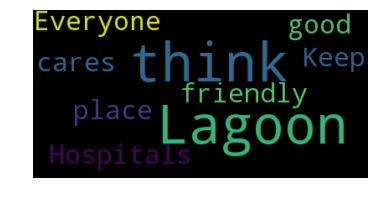

In [14]:
# Start with one review:
text = comments.Comments[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
text = " ".join(review for review in comments.Comments)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 17783 words in the combination of all review.


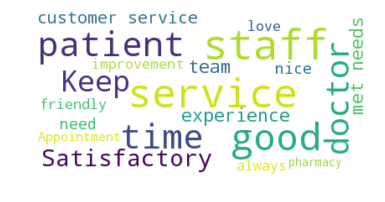

In [25]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["hospital", "Lagoon"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=20, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
# Save the image to my folder:
wordcloud.to_file("all_comments.png")

## Checking the comments for each location

### For Ikoyi

In [16]:
ikoyi = comments[comments["Location"] == "IKOYI"]

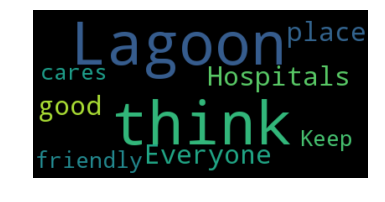

In [17]:
# Start with one review:
text = ikoyi.Comments[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
text = " ".join(review for review in ikoyi.Comments)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6117 words in the combination of all review.


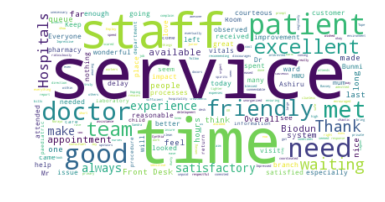

In [20]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["hospital", "Lagoon"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
ikoyi.head()

In [ ]:
ikoyi.to_csv("Ikoyi_Comments.csv")

### For VI

In [ ]:
vi = comments[comments["Location"] == "VI"]

In [ ]:
vi.to_csv("VI_Comments.csv")

### For Apapa

In [ ]:
apapa = comments[comments["Location"] == "APAPA"]

apapa.to_csv("Apapa_Comments.csv")

### For Ikeja

In [ ]:
ikeja = comments[comments["Location"] == "IKEJA"]

In [ ]:
ikeja.to_csv("Ikeja_Comments.csv")